In [1]:
# import torch
import csv

In [2]:

words = []

with open("unique_indian_first_names.csv", newline="") as f:
    reader = csv.reader(f)
    words = [row[0] for row in reader]



In [3]:
len(words)

6461

In [4]:
min(len(n) for n  in words)

1

In [5]:
max(len(n) for n  in words)

19

In [15]:
import torch




In [37]:
# Size 28 as we have 26 letters and 2 special chars S and E
N = torch.zeros(27, 27, dtype=torch.int32)

In [38]:
# Get all unique chars from words
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [39]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [40]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [42]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1 , ix2] += 1

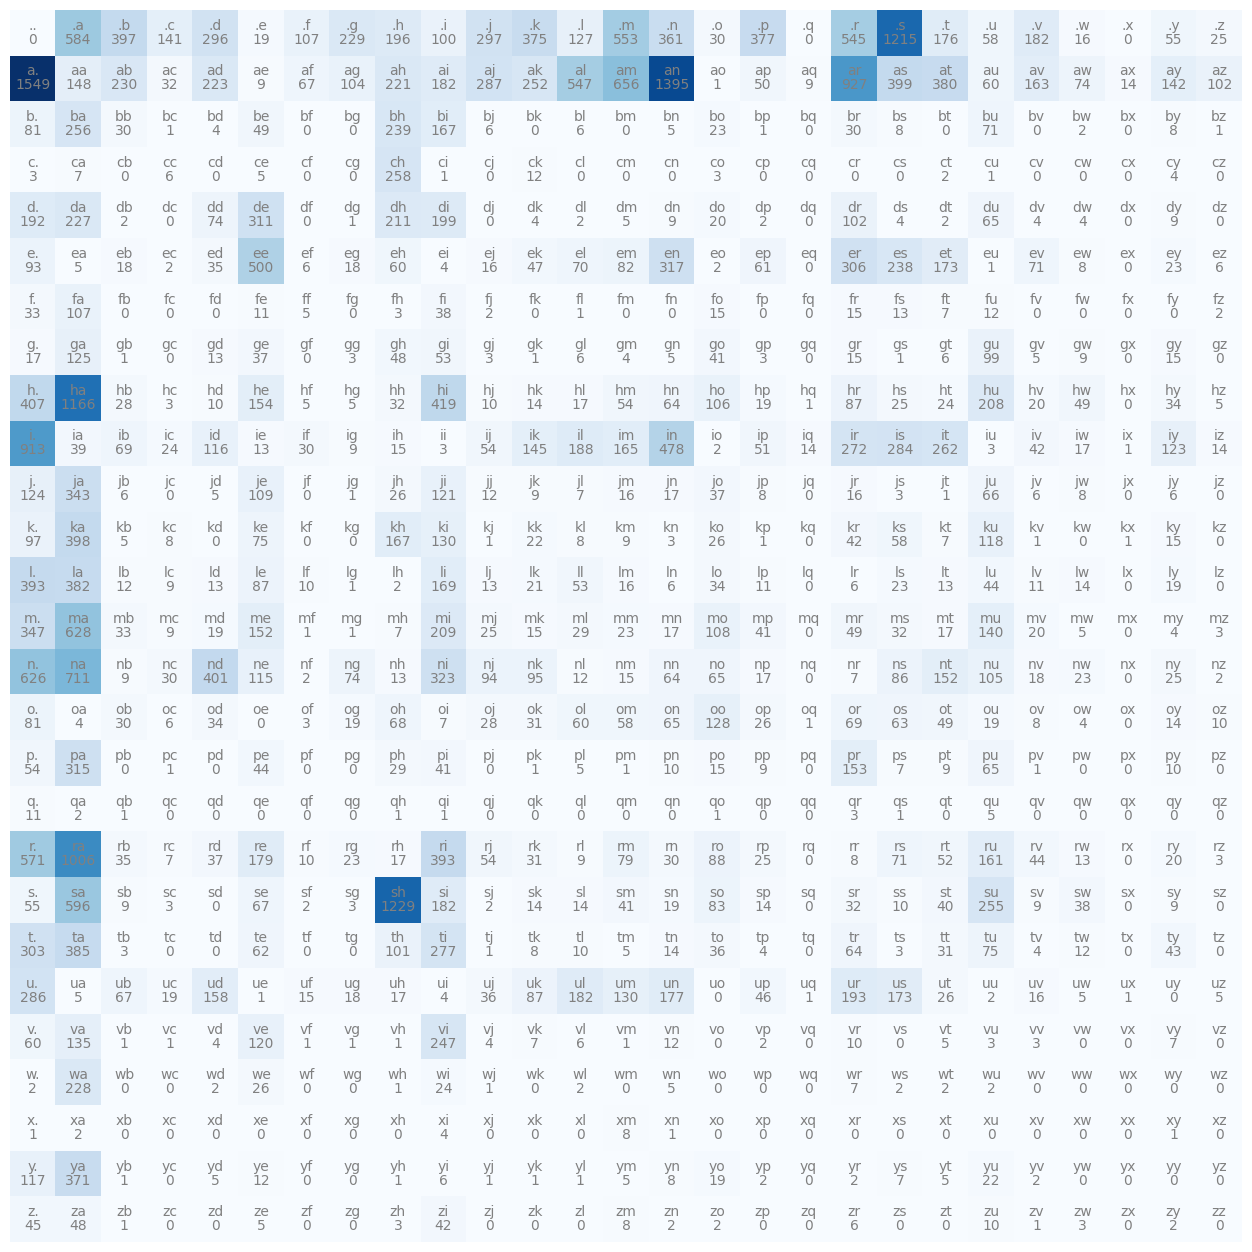

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [44]:
N[0, :]

tensor([   0,  584,  397,  141,  296,   19,  107,  229,  196,  100,  297,  375,
         127,  553,  361,   30,  377,    0,  545, 1215,  176,   58,  182,   16,
           0,   55,   25], dtype=torch.int32)

In [ ]:
# Now we need to create probablity distribution